![](./assets/ITDP_PrestigeLogo.png)

## Analysis of pollution levels
etc.

- __Source:__ [Meteorología,](http://www.aire.cdmx.gob.mx/default.php?opc='aKBhnmI='&opcion=Zw==)
[Contamianción](http://www.aire.cdmx.gob.mx/default.php?opc='aKBhnmI='&opcion=Zg==)
- __Responsable:__ Daniel Bustillos
- __Contact:__  juandaniel.bucam@gmail.com
___

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn
import datetime

Read processed pollution an weather data from 2015 to 2020 (may):

In [2]:
df_15 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2015.csv")
df_15 = df_15[df_15['mes']<5]

df_16 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2016.csv")
df_16 = df_16[df_16['mes']<5]

df_17 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2017.csv")
df_17 = df_17[df_17['mes']<5]

df_18 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2018.csv")
df_18 = df_18[df_18['mes']<5]

df_19 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2019.csv")
df_19 = df_19[df_19['mes']<5]

df_20 = pd.read_csv("./data/processed/met_cont_hora/cont_hora2020.csv")
df_20 = df_20[df_20['mes']<5]


Put the 5 tables together in one

In [3]:
df_append = pd.DataFrame(columns=df_19.columns.tolist())#change to 2019
df_append = df_append.append(df_15, ignore_index=True,sort=True)
df_append = df_append.append(df_16, ignore_index=True,sort=True)
df_append = df_append.append(df_17, ignore_index=True,sort=True)
df_append = df_append.append(df_18, ignore_index=True,sort=True)
df_append = df_append.append(df_19, ignore_index=True,sort=True)
df_append = df_append.append(df_20, ignore_index=True,sort=True)
del df_15, df_16
del df_17, df_18, df_19, df_20

Fix dates

In [4]:
df_append['año'] = df_append['fecha'].str[:4]

df_append['fecha'] = pd.to_datetime(df_append['fecha'], format='%Y-%m-%d %H:%M:%S')

df_append['fecha'] = pd.to_datetime(df_append['fecha']) - pd.to_timedelta(7, unit='d')

Get week nunmber

In [5]:
week_list = []
for row in range(len(df_append)):
    year = df_append.loc[row, "año"]
    month = df_append.loc[row, "mes"]
    day = df_append.loc[row, "dia"]
    week =  datetime.date(int(year), int(month), int(day)).isocalendar()[1]
    week_list.append(week)

df_append['week'] = week_list

df_append['año'] = df_append['año'].astype(int)
df_append['mes'] = df_append['mes'].astype(int)

**Table example**

In [6]:
df_append.head(8)

,CO,NO,NO2,NOX,O3,PBa,PM10,PM2.5,PMCO,RH,...,TMP,WDR,WSP,dia,fecha,hora,id_station,mes,año,week
0,0.6,14.0,21.0,35.0,4.0,NaN,84.0,NaN,NaN,82.0,...,9.0,358.0,1.8,1,2014-12-25 01:00:00,1,ACO,1,2015,1
1,1.2,3.0,58.0,61.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,180.0,1.3,1,2014-12-25 01:00:00,1,AJM,1,2015,1
2,NaN,NaN,NaN,NaN,3.0,NaN,86.0,NaN,NaN,78.0,...,10.1,150.0,0.7,1,2014-12-25 01:00:00,1,CHO,1,2015,1
3,1.7,11.0,51.0,62.0,14.0,NaN,NaN,NaN,NaN,75.0,...,10.1,204.0,1.4,1,2014-12-25 01:00:00,1,CUA,1,2015,1
4,NaN,74.0,22.0,96.0,3.0,NaN,186.0,NaN,NaN,95.0,...,6.1,238.0,0.3,1,2014-12-25 01:00:00,1,CUT,1,2015,1
5,1.7,17.0,49.0,66.0,5.0,NaN,153.0,NaN,NaN,83.0,...,10.9,NaN,NaN,1,2014-12-25 01:00:00,1,FAC,1,2015,1
6,1.6,37.0,49.0,86.0,3.0,586.0,123.0,84.0,38.0,70.0,...,11.9,317.0,1.3,1,2014-12-25 01:00:00,1,MER,1,2015,1
7,2.0,44.0,60.0,104.0,3.0,NaN,165.0,146.0,19.0,NaN,...,NaN,240.0,0.4,1,2014-12-25 01:00:00,1,MGH,1,2015,1


Obtain mean by day

In [7]:
df_day = df_append.groupby(['fecha', 'año'])[["TMP", "PM10", 'PM2.5', "O3", 'NO2']].mean().reset_index(drop=False)

___

## Analysis

### Pollutant Distribution

In [8]:
week_list = []
for row in range(len(df_append)):
    year = df_append.loc[row, "año"]
    month = df_append.loc[row, "mes"]
    day = df_append.loc[row, "dia"]
    week =  datetime.date(int(year), int(month), int(day)).isocalendar()[1]
    week_list.append(week)

df_append['week'] = week_list

df_append['año'] = df_append['año'].astype(int)
df_append['mes'] = df_append['mes'].astype(int)

In [9]:
def q1(x):
    return x.quantile(0.1)

def q2(x):
    return x.median()

def q3(x):
    return x.quantile(0.9)

def data_agg(df, contaminante, filter_week=1000):
    df_t = df.groupby(['week', 'año'])[[contaminante]].agg([q1,'mean', q3]).reset_index(drop=False)
    df_t.columns = ['week', 'año', contaminante + '_p1', contaminante + '_mean', contaminante + '_p9']
    df_t_mn = df_t[df_t['año']!=2020].groupby(['week'])[[contaminante + '_mean']].mean().reset_index(drop=False)
    df_t_mn['año'] = 'mean 2015-2019'
    df_t = df_t.append(df_t_mn)
    
    df_t = df_t[df_t['week']<= filter_week]
    df_t.rename(columns={'año': 'Year'}, inplace=True)
    return df_t

In [10]:
df_pm10 = data_agg(df=df_append, contaminante = "PM10", filter_week= 18)
df_pm25 = data_agg(df=df_append, contaminante = "PM2.5", filter_week= 18)
df_O3 = data_agg(df=df_append, contaminante = "O3", filter_week= 18)
df_NO2 = data_agg(df=df_append, contaminante = "NO2", filter_week= 18)
df_tmp = data_agg(df=df_append, contaminante = "TMP", filter_week= 18)

In [11]:
df_NO2.sample(2)

,week,Year,NO2_p1,NO2_mean,NO2_p9
68,12,2017,9.0,27.216201,47.0
47,8,2020,10.0,25.201203,43.0


**config**

In [12]:
sns.set_style("whitegrid")
a4_dims = (11.7, 8.27)
sns.set(rc={"lines.linewidth": 2})
sns.set_style("whitegrid")

years_to_plot = [2017,2018,2019]

len_pal = len(years_to_plot)+3

palette = sns.color_palette("mako_r", len_pal)

palette = sns.diverging_palette(255, 133, l=60, n=len_pal, center="dark")

#palette = sns.color_palette("BrBG", 6)

# palette =  sns.color_palette("cubehelix", 6)

In [13]:
def plot(contaminante, df, title, ylabel):
    
    sns.set_style("whitegrid")
    
    f, axes = plt.subplots(1 ,figsize=(15, 9), sharex=False)

    contaminante_mean = contaminante + "_mean"
    contaminante_p1 = contaminante + "_p1"
    contaminante_p9 = contaminante + "_p9"
    
    sns.set(style="ticks", rc={"lines.linewidth": .5})
    sns.lineplot(x="week", y=contaminante_mean, hue='Year', data=df[df['Year'].isin(years_to_plot)],
                 ax=axes, palette=palette[:len(years_to_plot)], alpha=.7)
    
    
    sns.set(style="ticks", rc={"lines.linewidth": 2})
    

    sns.lineplot(x="week", y=contaminante_mean, data=df[df['Year']==2020], color=palette[-1],
                  ax=axes, alpha=1., label='2020')
    
    sns.lineplot(x="week", y=contaminante_mean, data=df[df['Year']=='mean 2015-2019'], color=palette[-3],
                  ax=axes, alpha=1., label='mean 2015-2019')
    
#     sns.lineplot(x="week", y=contaminante_mean, hue='año', data=df[df['año']=='mean 2015-2019'],
#                  ax=axes, color='grey')
    
    axes.set_title("Mean " + title + ' by week', fontsize=18)
    axes.set_ylabel(ylabel, fontsize=14)
    axes.set_xlabel('Week number', fontsize=14)

    import matplotlib.ticker as ticker
    axes.xaxis.set_major_locator(ticker.MultipleLocator(1))
    axes.xaxis.set_major_formatter(ticker.ScalarFormatter())
    
    sns.despine()
    sns.despine(left=True)
    sns.despine(offset=10, trim=True);

    #####


    axes.grid(b=True, which='major', color='w', linewidth=1.0)
    axes.grid(b=True, which='minor', color='w', linewidth=0.5)
    
    name_save = "mean_" + title + '_week.png'
    f.savefig("./export_images/" + name_save, dpi=200)


## PM10

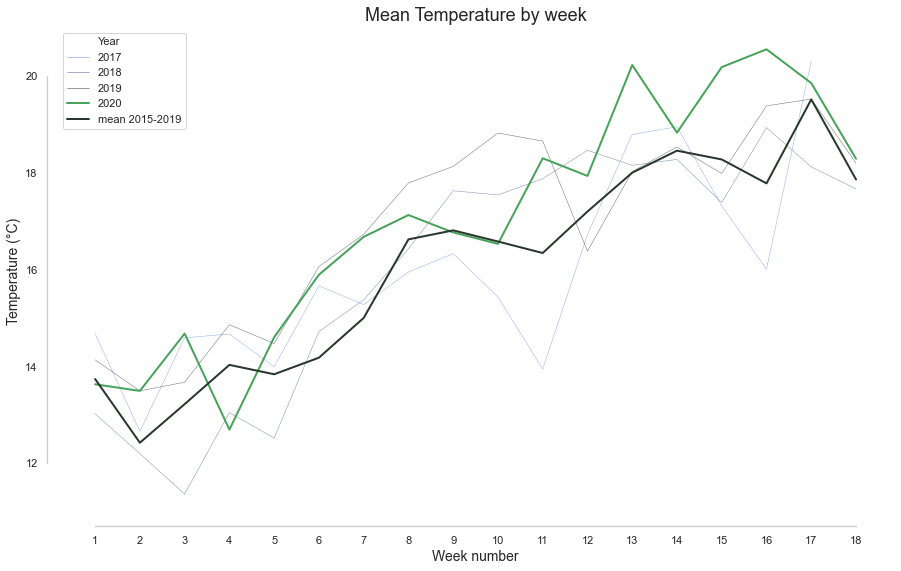

In [14]:
df = df_pm10
contaminante = 'TMP'
plot(contaminante='TMP', df=df_tmp, title='Temperature', ylabel='Temperature (°C)')

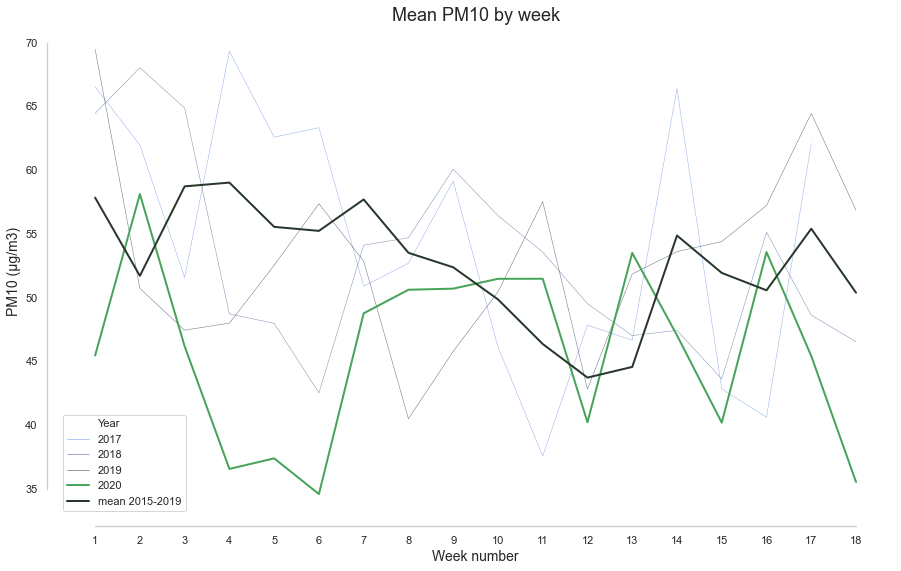

In [15]:
plot(contaminante='PM10', df=df_pm10, title='PM10', ylabel='PM10 (µg/m3)')

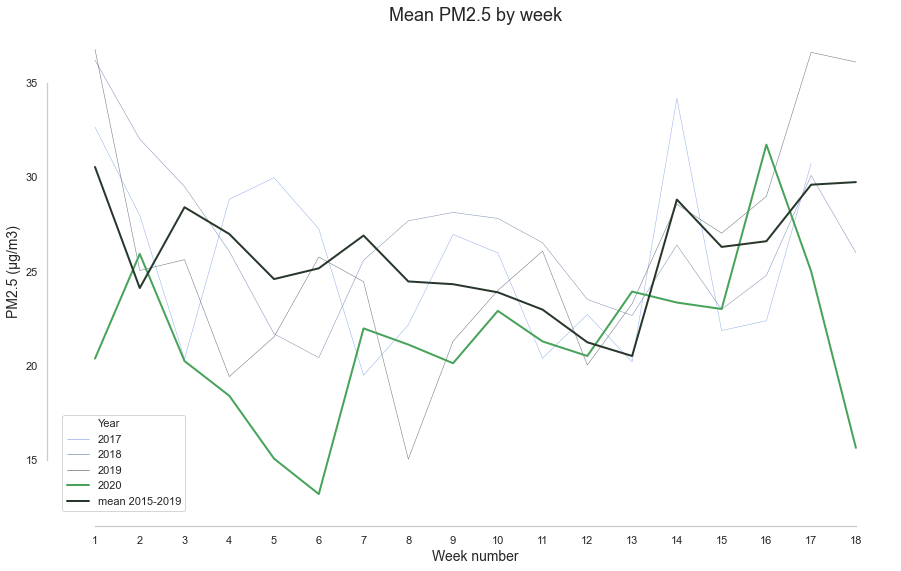

In [16]:
plot(contaminante='PM2.5', df=df_pm25, title='PM2.5', ylabel='PM2.5 (µg/m3)')

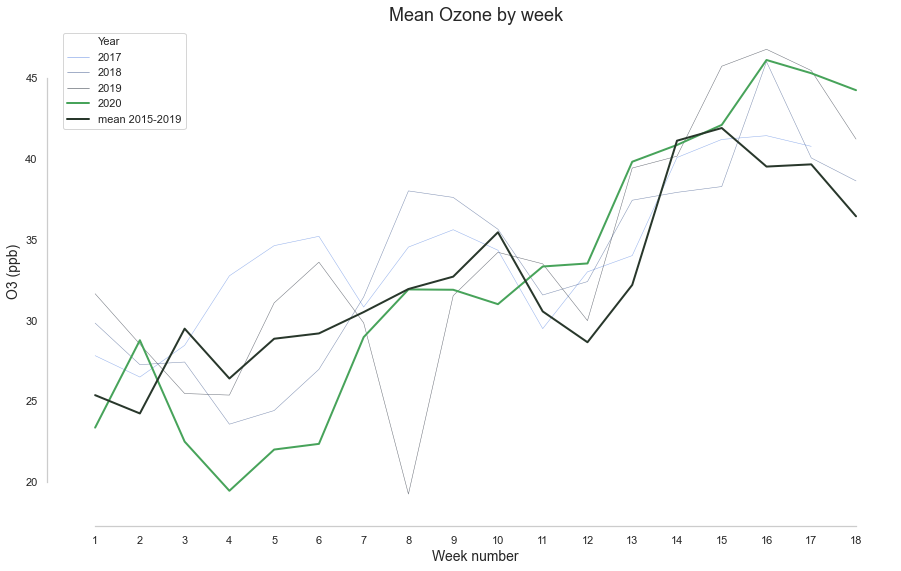

In [17]:
plot(contaminante='O3', df=df_O3, title='Ozone', ylabel='O3 (ppb)')

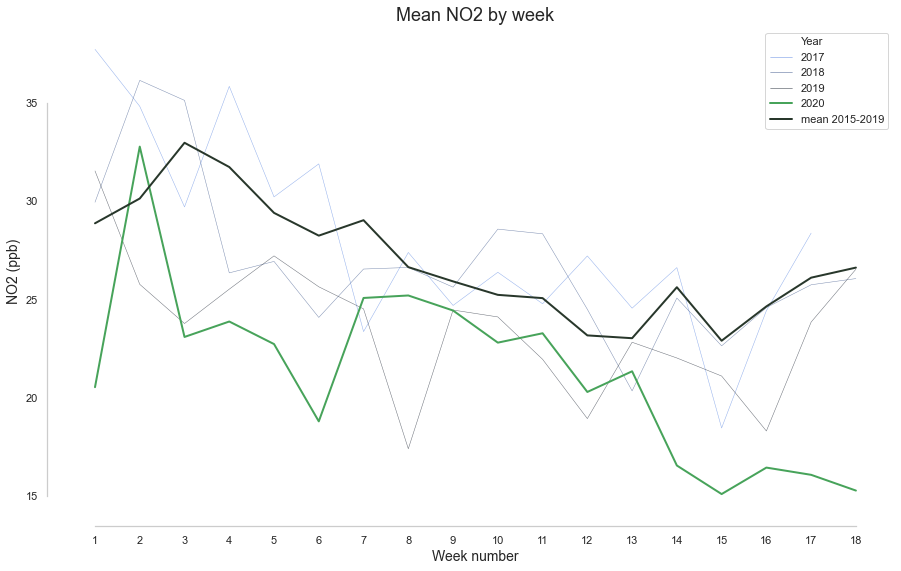

In [18]:
plot(contaminante='NO2', df=df_NO2, title='NO2', ylabel='NO2 (ppb)')